The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else.

This project is based on a hypothetical dataset downloaded from IBM HR Analytics Employee Attrition & Performance. 
It has 1,470 data points (rows) and 35 features (columns) describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. 

<b>Problem statement</b> To understand and determine how these factors relate to workforce attrition.

Dataset: https://www.kaggle.com/patelprashant/employee-attrition

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing  the Dataset
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


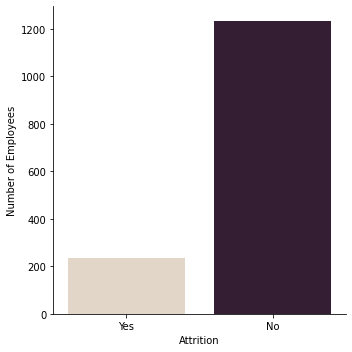

In [4]:
#Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df);
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

any missing values in the dataframe. 

In [5]:
#Identifying columns with missing information
missing_col = df.columns[df.isnull().any()].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


## Step 2 - Feature Engineering

The numeric and categorical fields need to be treated separately and the target field needs to be separated from the training dataset. The following few steps separate the numeric and categorical fields and drops the target field 'Attrition' from the feature set.

In [6]:
#Extracting the Numeric and Categorical features
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


### 2.1 Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.

In [7]:
#Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


### 2.2 Scaling Numeric Fields

The numeric fields have been scaled next for best results. StandardScaler() has been used for the same. Post scaling of the numeric features, they are merged with the categorical ones.

In [8]:
#Using StandardScaler to scale the numeric features
standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data = df_num_scaled, columns = df_num.columns, index = df_num.index)
print("Shape of Numeric After Scaling: ",df_num_scaled.shape)
print("Shape of categorical after Encoding: ",df_cat_encoded.shape)

Shape of Numeric After Scaling:  (1470, 26)
Shape of categorical after Encoding:  (1470, 29)


In [9]:
#Combining the Categorical and Numeric features
df_transformed_final = pd.concat([df_num_scaled,df_cat_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 55)


In [10]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

#Copying into commonly used fields for simplicity
X = df_transformed_final #Features
y = target #Target

Shape of target:  (1470,)


### 2.3 Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [11]:
#Splitting into Train and Test dataset in 90-10 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0, stratify = y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1176, 55)
Shape of X Test:  (294, 55)
Shape of y Train:  (1176,)
Shape of y Test:  (294,)


## Step 3 - Model Fitting



In [12]:
#Using Gradient Boosting to predict 'Attrition' and create the Trees to identify important features
gbm = GradientBoostingClassifier(n_estimators = 200, max_features = 0.7, learning_rate = 0.3, max_depth = 5, random_state = 0, verbose = 0)

#Fitting Model
gbm.fit(X_train, y_train)

#pred
y_pred = gbm.predict(X_test)


In [13]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.8503401360544217


In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[240   7]
 [ 37  10]]


## Step 4 - Visualisation and Identification of Important Features

Here, I have used the 'feature_importances_' array of the Gradient Boosting Model to ascertain the most important features for the prediction of 'Attrition'.


In [15]:
# Scatter plot 
trace = go.Scatter(
    y = gbm.feature_importances_,
    x = df_transformed_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 12,
        color = gbm.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_transformed_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')